# 正則化項

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [41]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [42]:
# 欠損値対応
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")
df.dropna(inplace=True)

In [26]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [46]:
# データの準備

y_col = "Salary"
X = df.loc[:, df.columns!= y_col]
y = df[y_col]

# 標準化のためにカラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

# ダミー変数
X = pd.get_dummies(X, drop_first=True, dtype=int)

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# モデル学習
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

251.01058042384852

In [49]:
model.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [51]:
# 線形回帰との比較
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

## 様々なλでRidgeの精度を比較しよう

In [122]:
# lamda_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lamda_list = np.logspace(-3, 3)

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# score_list = {}
# coef_list = {}

score_list = []
coef_list = []

for lamda in lamda_list:
    ridge = Ridge(alpha=lamda)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    # score_list[f'lamda:{lamda}'] = score
    # coef_list[f'lamda:{lamda}'] = ridge.coef_
    score_list.append(score)
    coef_list.append(ridge.coef_)

In [123]:
score_list

[121755.55191489436,
 121748.85142321732,
 121740.00084551261,
 121728.32401897271,
 121712.94237460963,
 121692.72191766015,
 121666.21195294677,
 121631.57874599684,
 121586.54167044151,
 121528.32642125848,
 121453.66013599705,
 121358.84632608078,
 121239.97046837126,
 121093.29251587059,
 120915.86710951588,
 120706.37916912162,
 120466.08294854613,
 120199.60670028828,
 119915.29937781733,
 119624.8448881687,
 119342.10042188948,
 119081.44332159919,
 118856.13699970403,
 118677.19450148549,
 118552.95548000305,
 118489.26210208681,
 118489.8708797582,
 118556.67365623647,
 118689.5387425857,
 118886.13914715388,
 119142.65935242688,
 119456.11802749545,
 119827.92637198897,
 120266.92159170505,
 120789.80494522843,
 121418.33915030923,
 122174.90796519505,
 123079.31407912797,
 124149.02580273552,
 125403.18292335409,
 126869.04970382873,
 128589.21806639318,
 130628.562857349,
 133080.70104933387,
 136073.24005204797,
 139768.8808195282,
 144356.52115979916,
 150025.50524303646

In [126]:
coef_list[0]

array([-269.20709912,  273.09853046,   60.00312507,  -55.43945326,
          3.55956614,  131.11599868,  -14.85016257, -513.01796898,
        548.64864002,  -12.51824836,  299.41144264,    5.02291572,
       -156.9340291 ,   73.31994319,   54.91115843,  -35.62997817,
          1.52933046,  -95.03112895,   28.52555713])

Text(0, 0.5, 'MSE')

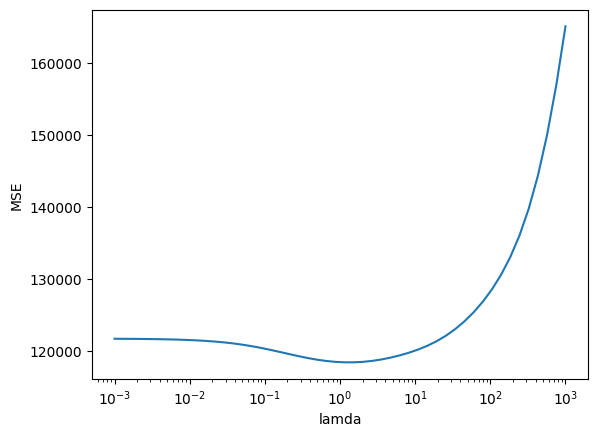

In [129]:
plt.plot(lamda_list, score_list)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('MSE')

In [103]:
# coef_df = pd.DataFrame(data=coef_list.values(), index=lamda_list, columns=X_train.columns)

<Axes: >

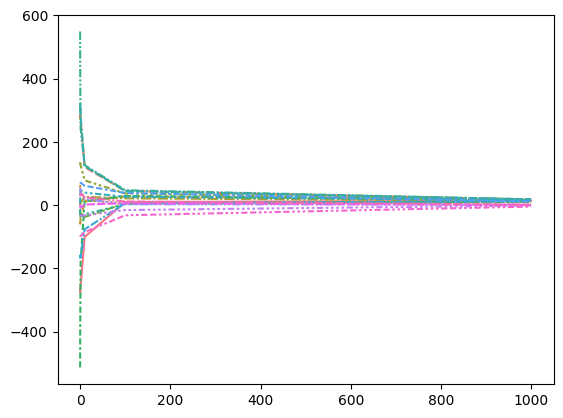

In [114]:
# sns.lineplot(data=coef_df, legend=None)

Text(0, 0.5, 'standardized coef')

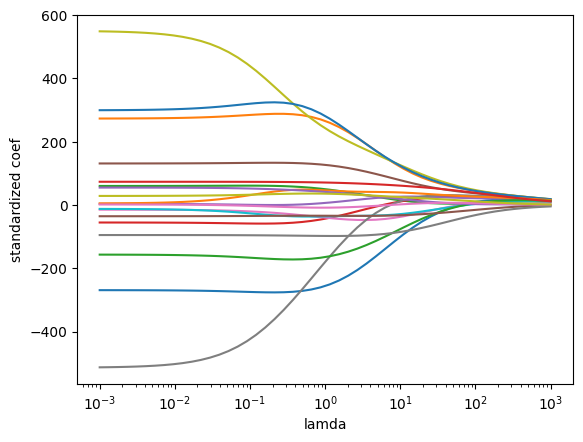

In [135]:
plt.plot(lamda_list, coef_list)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('standardized coef')
# plt.legend()

## Lasso

In [143]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

117768.90478161343
250.24481877112984


In [142]:
lasso.coef_

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

## 様々なλでのLassoの精度を比較しよう

In [149]:
import warnings
warnings.simplefilter('ignore')

In [153]:
lamda_list = np.logspace(-3, 3)

mse_scores = []
coef_list = []

for lamda in lamda_list:
    lasso = Lasso(alpha = lamda)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    coef_list.append(lasso.coef_)

Text(0, 0.5, 'MSE')

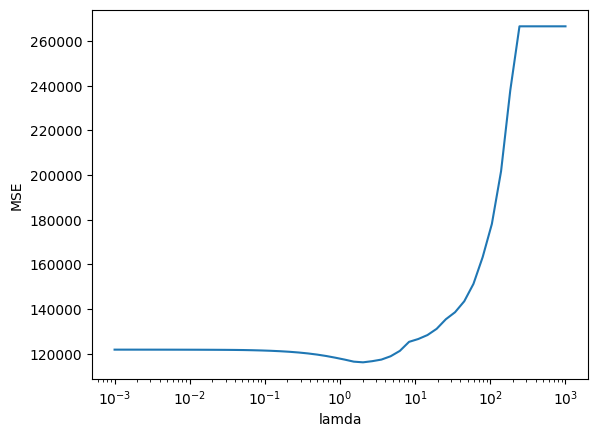

In [156]:
plt.plot(lamda_list, mse_scores)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('MSE')

Text(0, 0.5, 'coef values')

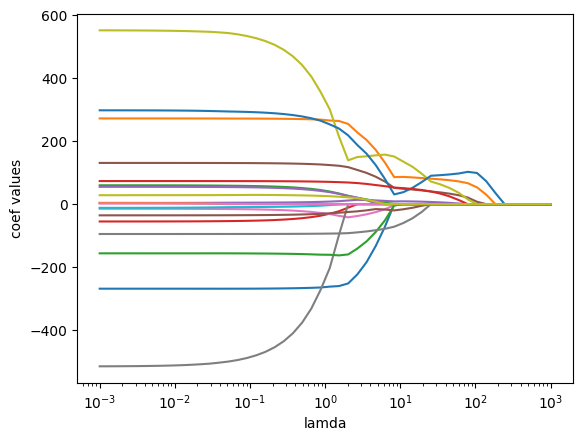

In [161]:
plt.plot(lamda_list, coef_list)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('coef values')

In [165]:
lamda_list[np.argmin(mse_scores)]

2.023589647725158

In [167]:
np.min(mse_scores)

116122.45120731373

In [169]:
lasso = Lasso(alpha = lamda_list[np.argmin(mse_scores)])
lasso.fit(X_train, y_train)
lasso.coef_

array([-252.19222786,  254.95517425,   26.34476738,  -11.1644903 ,
         11.55462205,  117.61960902,  -41.9368323 ,   -0.        ,
        139.31490657,   -0.        ,  218.61993867,    0.        ,
       -159.99440584,   68.72670632,   26.06178039,  -25.04508935,
          0.        ,  -92.29918255,   21.63684134])

In [171]:
pd.DataFrame({'coef':lasso.coef_, 'column_name':X_train.columns.to_list()})

,coef,column_name
0,-252.192228,AtBat
1,254.955174,Hits
2,26.344767,HmRun
3,-11.164490,Runs
4,11.554622,RBI
5,117.619609,Walks
6,-41.936832,Years
7,-0.000000,CAtBat
8,139.314907,CHits
9,-0.000000,CHmRun
